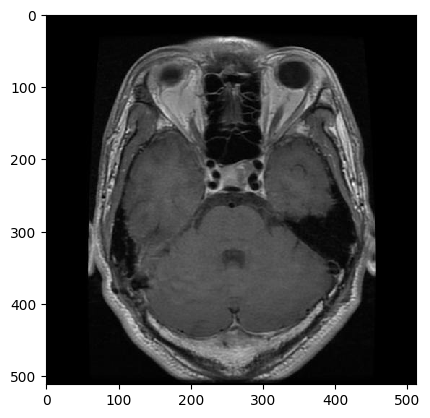

In [10]:
img = cv2.imread('brain-tumor-mri-dataset/Testing/pituitary/Te-piTr_0000.jpg')
img = cv2.resize(img,(75,75))
img_array = np.array(img)
img_array.shape

img_array = img_array.reshape(1,75,75,3)
img_array.shape

from tensorflow.keras.preprocessing import image
img = image.load_img('brain-tumor-mri-dataset/Testing/pituitary/Te-piTr_0000.jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [11]:
a=model.predict(img_array)
indices = a.argmax()
indices

3

In [12]:
from collections import defaultdict

dataset = np.random.randint(0, 10, size=(7022, 2))  
labels = np.random.randint(0, 4, size=(7022,))  

train_ratio = 0.8
test_ratio = 0.1
val_ratio = 0.1

class_samples = defaultdict(list)
for i, label in enumerate(labels):
    class_samples[label].append(dataset[i])

train_set = []
test_set = []
val_set = []

for class_label, samples in class_samples.items():
    num_samples = len(samples)
    num_train_samples = int(num_samples * train_ratio)
    num_test_samples = int(num_samples * test_ratio)
    num_val_samples = num_samples - num_train_samples - num_test_samples

    np.random.seed(101)  
    
    train_set.extend(samples[:num_train_samples])
    test_set.extend(samples[num_train_samples:num_train_samples+num_test_samples])
    val_set.extend(samples[num_train_samples+num_test_samples:])

train_set = np.array(train_set)
test_set = np.array(test_set)
val_set = np.array(val_set)

for class_label, samples in class_samples.items():
    num_train_samples = int(len(samples) * train_ratio)
    num_test_samples = int(len(samples) * test_ratio)
    num_val_samples = len(samples) - num_train_samples - num_test_samples

    print("Class Label:", class_label)
    print("Number of samples in train set:", num_train_samples)
    print("Number of samples in test set:", num_test_samples)
    print("Number of samples in validation set:", num_val_samples)

Class Label: 1
Number of samples in train set: 1380
Number of samples in test set: 172
Number of samples in validation set: 173
Class Label: 0
Number of samples in train set: 1428
Number of samples in test set: 178
Number of samples in validation set: 180
Class Label: 3
Number of samples in train set: 1385
Number of samples in test set: 173
Number of samples in validation set: 174
Class Label: 2
Number of samples in train set: 1423
Number of samples in test set: 177
Number of samples in validation set: 179


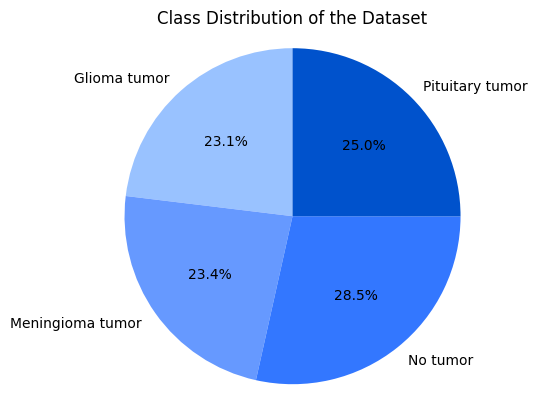

In [13]:
numbers = [1621, 1645, 2000, 1757] 
total = sum(numbers)
percent = [(num /total) * 100 for num in numbers]
colors = ['#99c2ff', '#6699ff', '#3377ff', '#0052cc']
labels=['Glioma tumor','Meningioma tumor', 'No tumor', 'Pituitary tumor']

fig1, ax1 = plt.subplots()
ax1.pie(percent, colors = colors, labels = labels, autopct = '%1.1f%%', startangle = 90)
ax1.axis('equal')
plt.title("Class Distribution of the Dataset")
plt.show()

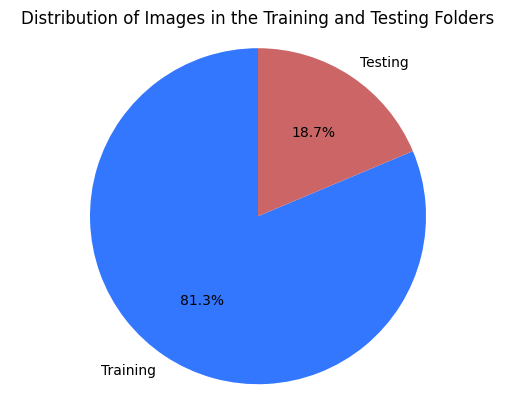

In [14]:
train = 5712
test = 1311
total = train + test
train_percent = (train / total) * 100
test_percent = (test / total) * 100
labels = ['Training', 'Testing']
percent = [train_percent, test_percent]
colors = ['#3377ff', '#cc6666']

fig1, ax1 = plt.subplots()
ax1.pie(percent, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.title("Distribution of Images in the Training and Testing Folders")
plt.show()